<a href="https://colab.research.google.com/github/ShahriarParib/ML-Related-Codes/blob/main/Ridge_My_Own_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=10)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

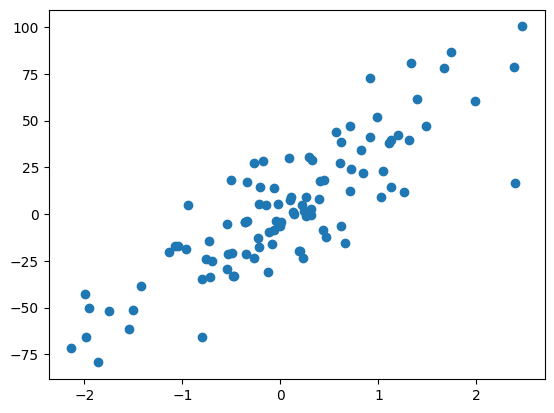

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[31.34493951]
1.0560830217516393


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[28.31692669]
1.2965576951719218


In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[15.14738848]
2.342438471999783


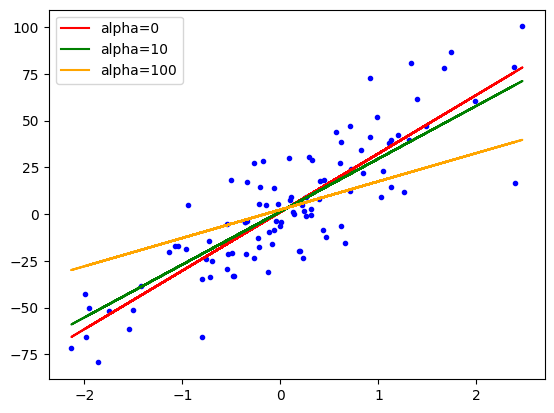

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [38]:
class Myridge:
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(X_train.shape[0]):
      num=num+(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
      den=den+(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())

    self.coef_=num/(den+self.alpha)
    self.intercept_=y_train.mean()-(self.coef_*X_train.mean())
    print(self.coef_,self.intercept_)
  def predict(self,X_test):
    return self.intercept_+np.dot(X_test,self.coef_)

In [39]:
rid=Myridge(alpha=100)

In [40]:
rid.fit(X,y)

[15.14738848] [2.34243847]


**FOR N DIMENSIONAL DATA**

In [41]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [42]:
X,y = load_diabetes(return_X_y=True)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [45]:
from sklearn.linear_model import Ridge

In [46]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [47]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [48]:
Ridge(alpha=0.1, solver='cholesky')

Ridge(alpha=0.1, solver='cholesky')

In [49]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [50]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [52]:
class MyRidge1:

    def __init__(self,alpha=0.1):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [53]:
regm=MyRidge1()

In [55]:
regm.fit(X_train,y_train)

In [58]:
y_pred = regm.predict(X_test)
print(r2_score(y_test,y_pred))
print(regm.coef_)
print(regm.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281
